In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Barclays/


/content/drive/MyDrive/Barclays


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Bond_Index.csv')#, chunksize=10000, low_memory=False)

In [ ]:
dates = df['Date'].unique()

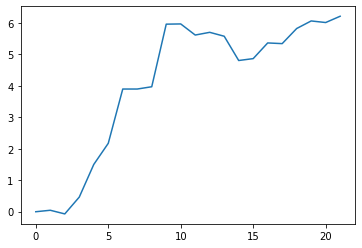

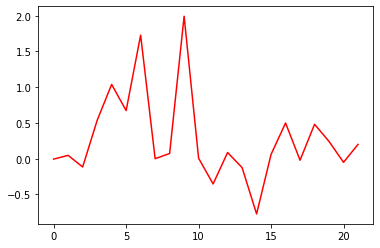

In [ ]:
#code to calculate the daily returns and the bond weights in the index
total_returns= []
for i in range(len(dates)) :
  one_set = df[df["Date"]==dates[i]]
  total = one_set["Market_Value_BOM"].sum()
  bond_weights = one_set[["ID","Market_Value_BOM","Excess_Return_MTD","Total_Return_MTD"]]
  bond_weights["bond_index_weights"] = bond_weights["Market_Value_BOM"]/total
  bond_weights["Index_Total_Return_MTD"] = bond_weights["bond_index_weights"]*bond_weights["Total_Return_MTD"]
  total_returns.append(bond_weights["Index_Total_Return_MTD"].sum())
plt.plot(total_returns)
plt.show()
total_returns= np.asarray(total_returns)
total_returns_shifted=[0]
total_returns_shifted.extend(total_returns[:-1])
daily_returns = total_returns - total_returns_shifted
# print(total_returns,"\n", total_returns_shifted)
plt.plot(daily_returns,'r')
plt.show()


In [ ]:
index_daily_return = daily_returns
Average_index_daily_returns = np.mean(daily_returns, axis = 0)

In [ ]:
daily_bond_index_value = 100*(1+total_returns/100)

1.0982823967010438
[ 99.99400658 100.04066295  99.92438675 100.45992379 101.49846679
 102.17114644 103.89890668 103.89890668 103.97152028 105.96348273
 105.97046465 105.61725676 105.70352023 105.57895518 104.80660969
 104.86677479 105.36560512 105.34401384 105.8248766  106.06575741
 106.01521964 106.21538166]


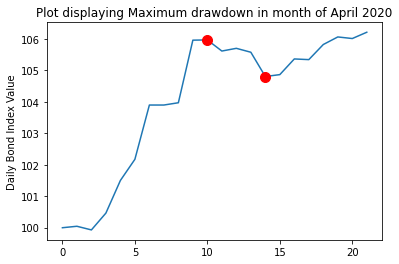

In [ ]:
# Max drawdown calculation
i = np.argmax(np.maximum.accumulate(daily_bond_index_value) - daily_bond_index_value) # end of the period
j = np.argmax(daily_bond_index_value[:i]) # start of period
max_drawdown = 100*(daily_bond_index_value[j]-daily_bond_index_value[i])/(daily_bond_index_value[j])
print(max_drawdown)
print(daily_bond_index_value)
plt.plot(daily_bond_index_value)
plt.plot([i, j], [daily_bond_index_value[i], daily_bond_index_value[j]], 'o', color='Red', markersize=10)
plt.ylabel('Daily Bond Index Value')
plt.title('Plot displaying Maximum drawdown in month of April 2020')
fig.show()

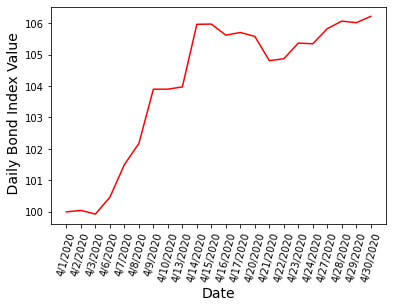

In [ ]:
fig,ax = plt.subplots()
ax.plot(dates, daily_bond_index_value, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel(" Daily Bond Index Value",fontsize=14)
plt.xticks(rotation = 75)
fig.show()

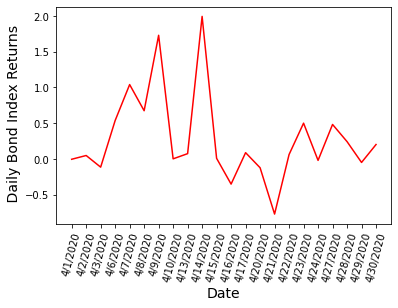

In [ ]:
fig,ax = plt.subplots()

ax.plot(dates, daily_returns, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel(" Daily Bond Index Returns",fontsize=14)
plt.xticks(rotation = 75)
fig.show()

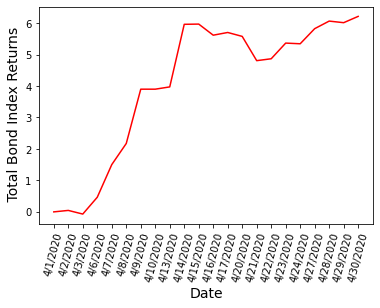

In [ ]:
fig,ax = plt.subplots()

ax.plot(dates, total_returns, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel(" Total Bond Index Returns",fontsize=14)
plt.xticks(rotation = 75)
fig.show()

In [ ]:
df_month_end = df[df["Date"] == '4/30/2020']

In [ ]:
sectors = df['Sector'].unique()
print(sectors)

['CONS' 'IND' 'TECH' 'FIN' 'E&U']


[8.29561979 7.58614515 5.59164204 5.21401153 3.53068983]


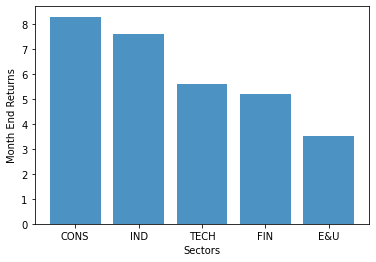

In [ ]:
#code to calculate the sectorwise returns
sector_total_returns= []
for i in range(len(sectors)) :
  one_sector = df_month_end[df_month_end["Sector"]==sectors[i]]
  total_sector_weight = one_sector["Market_Value"].sum()
  sector_bond_weights = one_sector[["ID","Market_Value","Excess_Return_MTD","Total_Return_MTD"]]
  sector_bond_weights["sector_bond_weights"] = sector_bond_weights["Market_Value"]/total_sector_weight
  sector_bond_weights["Sector_Total_Return_MTD"] = sector_bond_weights["sector_bond_weights"]*sector_bond_weights["Total_Return_MTD"]
  sector_total_returns.append(sector_bond_weights["Sector_Total_Return_MTD"].sum())
sector_total_returns= np.asarray(sector_total_returns)
print(sector_total_returns)

plt.bar(sectors, sector_total_returns, alpha=0.8)
plt.ylabel('Month End Returns')
plt.xlabel('Sectors')
plt.show()

In [ ]:
#sanity check 
bond_weights["bond_index_weights"].sum()

1.0

In [ ]:
ids = df['ID'].unique()

for id in ids:
  dfi = df[df['ID']==id]

In [ ]:
unique_bonds = df['ID'].unique()

In [ ]:
#daily returns calculation for each bond

#total_returns= []
n = len(unique_bonds)
total_returns_MTD = np.zeros([n,22])
excess_returns_MTD = np.zeros([n,22])
for i in range(len(unique_bonds)) :
  one_bond = df[df["ID"]==unique_bonds[i]]
  df_Sharp_temp = one_bond[["ID","Market_Value","Excess_Return_MTD","Total_Return_MTD"]]
  one_bond["Daily_Total_Return"] = one_bond["Total_Return_MTD"]
  total_returns_MTD[i,:] = one_bond["Total_Return_MTD"].values
  excess_returns_MTD[i,:] = one_bond["Excess_Return_MTD"].values
  # one_bond["Daily_Excess_Return"] = one_bond["Excess_Return_MTD"]

total_returns_daily = np.zeros([n,22])
excess_returns_daily = np.zeros([n,22])

for i in range(n) :
  total_returns_daily[i,0]=total_returns_MTD[i,0]
  excess_returns_daily[i,0]=excess_returns_MTD[i,0]
  for j in range(1,22) :
    total_returns_daily[i,j] = total_returns_MTD[i,j]-total_returns_MTD[i,j-1]
    excess_returns_daily[i,j] = excess_returns_MTD[i,j]-excess_returns_MTD[i,j-1]


In [ ]:
#sharp ratio calculation trial
np.mean(excess_returns_daily[498,:], axis=0)
np.std(total_returns_daily[498,:], axis=0)
sharp_ratio = np.mean(excess_returns_daily[498,:], axis=0)/np.std(total_returns_daily[498,:], axis=0)

In [ ]:
#sharp ratio calculation
n = len(unique_bonds)
Mean_Excess_Returns = np.zeros([n,1])
Variance_Daily_Returns = np.zeros([n,1])
sharp_ratio_values = np.zeros([n])
for i in range(len(unique_bonds)) :
  Mean_Excess_Returns[i,0] = np.mean(excess_returns_daily[i,:], axis=0)
  Variance_Daily_Returns[i,0] = np.std(total_returns_daily[i,:], axis=0)
  sharp_ratio_values[i] = Mean_Excess_Returns[i,0]/Variance_Daily_Returns[i,0]

#print(sharp_ratio_values)
sharp_ratio_values.shape


(702,)

In [ ]:
#code to calculate the top 20 Sharpe ratio bonds
print(sharp_ratio_values.shape)
ind = np.argpartition(sharp_ratio_values, -20)[-20:]
print(ind)
print(unique_bonds[ind])
sharp_ratio_values[ind]

(702,)
[498 381 211 463 300 326 543 612 293 340 346 450 281 510 277 353 375 372
 484 230]
['B499' 'B382' 'B212' 'B464' 'B301' 'B327' 'B544' 'B613' 'B294' 'B341'
 'B347' 'B451' 'B282' 'B511' 'B278' 'B354' 'B376' 'B373' 'B485' 'B231']


array([0.72309574, 0.74537461, 0.75564292, 0.75859586, 0.78978596,
       0.86612601, 0.77534636, 0.93208616, 0.73252357, 0.73992032,
       0.90293421, 0.76854178, 0.82320386, 0.80153915, 0.85771441,
       1.03542023, 0.81293951, 0.84032534, 0.75496166, 0.73639623])

In [ ]:
return_vec = total_returns_daily[ind]

In [ ]:
%matplotlib inline
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd
np.random.seed(123)
solvers.options['show_progress'] = False
import plotly
import cufflinks
plotly.__version__
!pip install chart_studio
import chart_studio.plotly as py
import plotly.tools as tls   
from plotly.graph_objs import *

## NUMBER OF ASSETS
n_assets = 20

## NUMBER OF OBSERVATIONS
n_obs = 22

return_vec = total_returns_daily[ind]

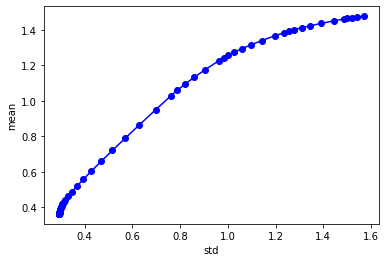

In [ ]:
#Efficient frontier code
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(risks, returns, 'b-o')
plt.ylabel('mean')
plt.xlabel('std')
plt.show()

In [ ]:
#Information Ratio Calculation
portfolio_weights = weights[:,0]
print(portfolio_weights)
# print(return_vec[:,0])
# print(portfolio_weights*return_vec[:,0])

portfolio_returns = np.zeros(22)
for i in range(22) :
  portfolio_returns[i] = np.sum(portfolio_weights*return_vec[:,i])

IR_std = np.std(portfolio_returns-index_daily_return)

IR = (np.mean(portfolio_returns)-np.mean(index_daily_return))/IR_std
print(IR)

[6.45876901e-09 3.66515117e-09 2.23875234e-01 3.45314035e-09
 2.63023265e-09 3.65907628e-09 5.79441528e-09 9.43706133e-09
 1.47709522e-01 3.91985459e-09 5.86155169e-09 3.53270274e-09
 5.04947425e-09 2.50048710e-01 2.22355895e-01 3.16414220e-09
 2.32038781e-08 1.56010552e-01 4.30210621e-09 2.64131916e-09]
1.6249802617582823


In [ ]:
#Code to print Bonds in the portfolio
df_sectors_new = df[df["ID"] == unique_bonds[ind[0]]].head(1)
for i in range(0,len(ind)) :
  temp = df[df["ID"] == unique_bonds[ind[i]]].head(1)
  print(temp)
  

         Date    ID Sector  ... Index_Rating  Excess_Return_MTD  Total_Return_MTD
498  4/1/2020  B499    IND  ...       B3                 0.1788            0.0784

[1 rows x 12 columns]
         Date    ID Sector  ... Index_Rating  Excess_Return_MTD  Total_Return_MTD
381  4/1/2020  B382    IND  ...       BA1                0.3784            0.2751

[1 rows x 12 columns]
         Date    ID Sector  ... Index_Rating  Excess_Return_MTD  Total_Return_MTD
211  4/1/2020  B212   CONS  ...       BA2                2.6237             3.318

[1 rows x 12 columns]
         Date    ID Sector  ... Index_Rating  Excess_Return_MTD  Total_Return_MTD
463  4/1/2020  B464   TECH  ...       CAA1               1.1886            1.1091

[1 rows x 12 columns]
         Date    ID Sector  ... Index_Rating  Excess_Return_MTD  Total_Return_MTD
300  4/1/2020  B301   CONS  ...       B1                 0.0199            -0.085

[1 rows x 12 columns]
         Date    ID Sector  ... Index_Rating  Excess_Return_MTD  